# Separate Modality Tracking

Tracking using only one modality can lead to missed objects that are more easily detectable through another modality. For instance, people in complete darkness are better tracked using infrared.

## Visible only

Visible only.png

## Infra Red only

IR ONly.png

# Both modalities tracking

When tracking in both modalities, the tracker receives frames from each modality in sequence—first a visual frame, then an infrared frame. This sequential input confuses the tracker and degrades its performance.

## Visual-Infra Red

Scene (9).png

## Infra Red-Visual

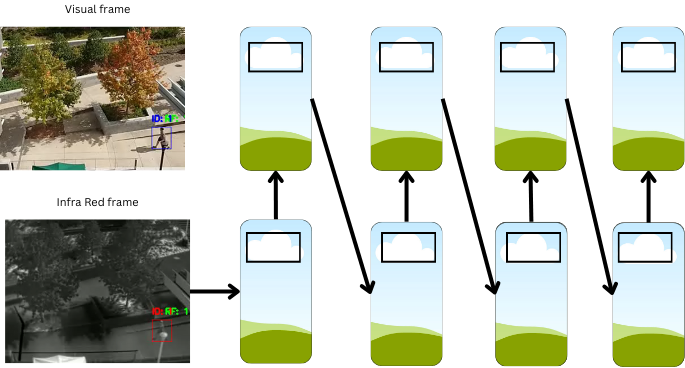

# Primary Modality with Backup

The user selects a primary modality, and if the tracker fails to track the ROI for N (3 in my case) consecutive frames, it switches to a different modality. It is important to note that the tracker will revert to the primary modality as soon as it successfully tracks the object again within that modality.

## Primar Visual with Infra red Backup

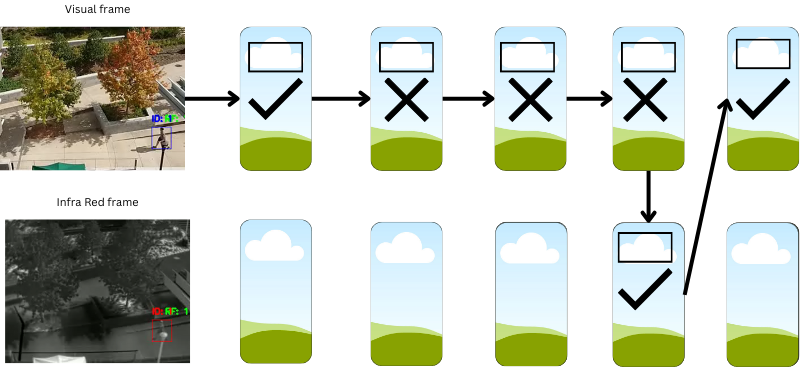

## Primar Infra red with Visual Backup

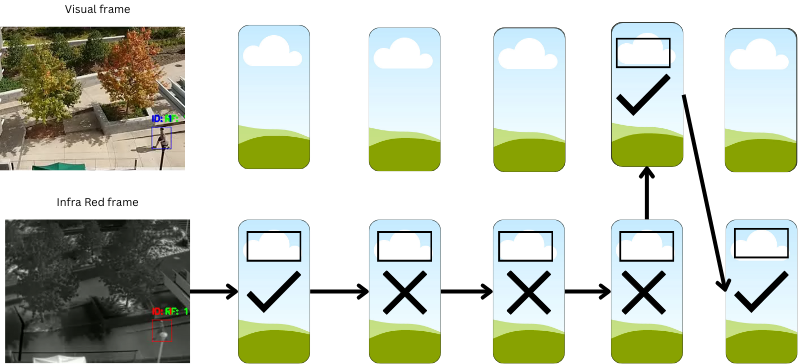

# Alternating Frame Tracking

This tracking method alternates between different modalities every other frame, but the result is similar to feeding the tracker both modalities simultaneously, leading to confusion and worsening of the results

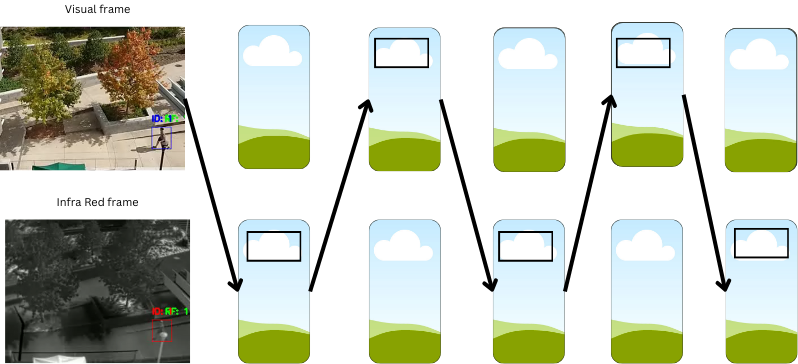

# Frame Pixel Intensity-Based Decision

this tracking uses heuristic that determines if a specific area within an image is primarily dark. The function calculates the average brightness and the range of brightness values in the region. If both the average brightness is below a set threshold(20 thus very dark) and the brightness range is smaller then set threshold(100), the region is considered mostly dark and the function tracks in infra red; otherwise, it tracks in visual.

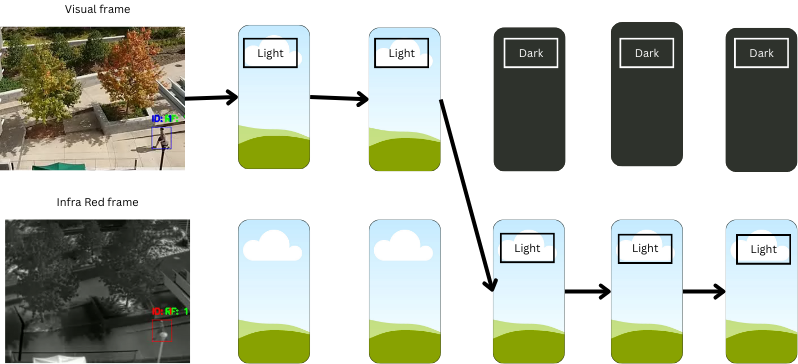

# ROI Pixel Intensity-Based Decision

The ROI std for pixel intensities is calculated for ROI in each modality. Then it tracks in the modality, where the std is bigger.

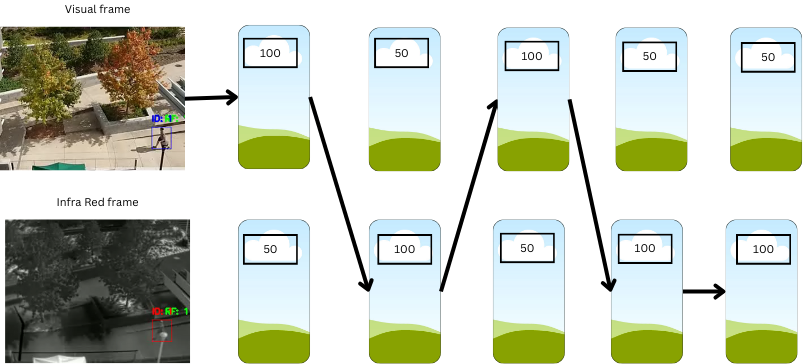

# Machine learning methods
These approaches use machine learning to decide which modality to use. There are three methods, each trained on different types of data:

*   A: Trained on 30 % of all data with frame information
*   B: Trained on 30 % of all data without frame information
*   BEST: Trained on handpicked data without frame information

## Machine Learning-Based Decision

Based on the method used the features are extracted from both IR and Visible initial frames and both of them are fed into machine learning model to decide which modality is better for tracking given ROI for the rest of the tracking.

Scene (16).png

## Machine learning-frame-based detection

The above mentioned approach is the same but repeated every frame. This sometimes confuses the tracker thus worsening results

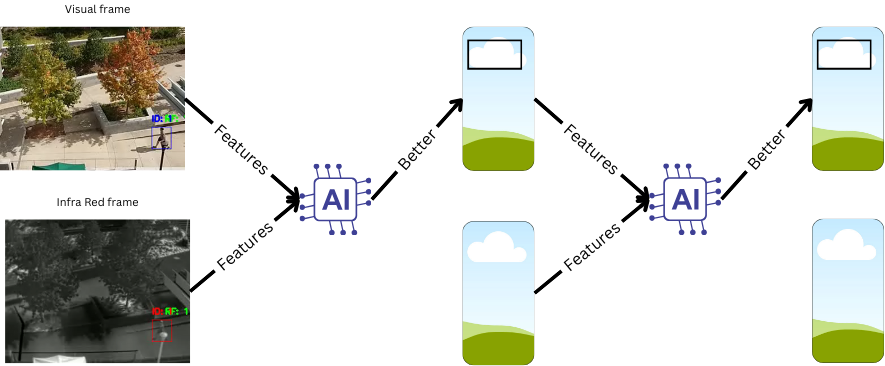

## Machine learning-frame based detection with sliding window

To tackle the issue of unnecessary switching between modality a certainty window has been implemented, where the machine learning algorithm has to conclude that the other modality is better in 3 consequtive frames between switching.

Scene (18).png

# Outlook of all methods

1.   
   * IR
   * VIS
2.   
   * IR
   * VIS
3.   
   * IR
   * VIS
4.   
   * None
5.   
   * None
6.   
   * None
7.   
   * A
   * B
   * BEST
8.   
   * A
   * B
   * BEST
9.   
   * A
   * B
   * BEST


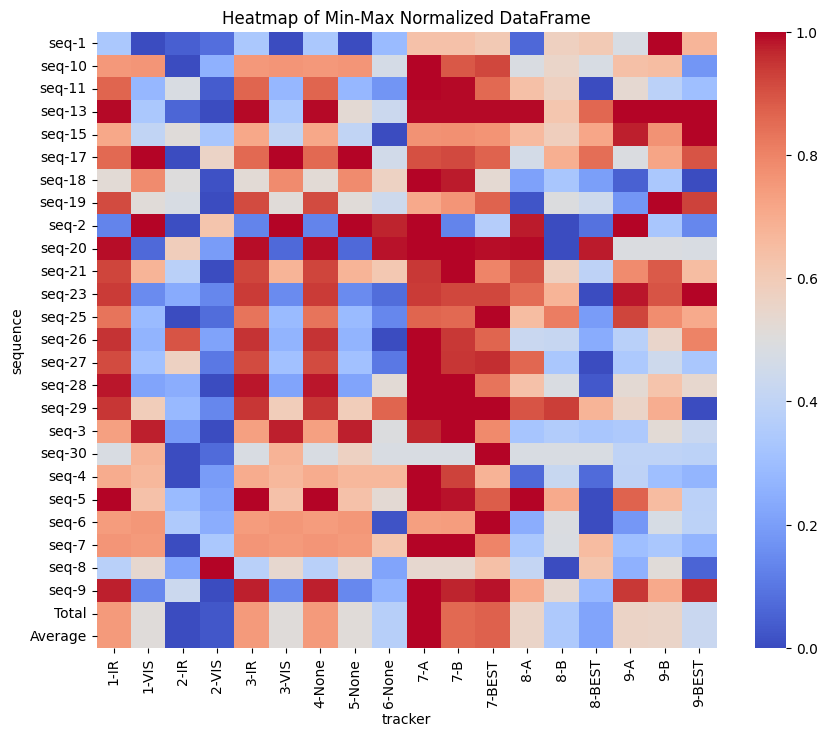